In [1]:
import qutip as qt
import numpy as np

# Tracking info of simulations 
import tqdm
import time
import warnings

#Saving data
import pandas as pd
import json
import os

import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec

import model_building as md
import Hamiltonian as Ham
import dynamics as dyn
import data_handling as dh
import plots as plots

In [2]:
def initialize_system(state_dictionary, N):
    initial_state = md.crate_domain_wall_state(state_dictionary, register='Alice')
    final_state   = md.crate_domain_wall_state(state_dictionary, register='Bob')

    initial_chain = md.initialize_general_system(N, initial_state, register='Alice')
    final_chain   = md.initialize_general_system(N, final_state, register='Bob')

    register_size = len(initial_state.dims[0])
    
    return initial_chain, final_chain, register_size

def build_hamiltonians(N, lmd, J, reg_size):

    H_transport = Ham.Hamiltonian(system_size = N,
                        mode = "forward",
                        lambda_factor = lmd,
                        global_J = J
                        )
    H_reset     = Ham.Hamiltonian(system_size = N,
                        mode = "backward",
                        lambda_factor = lmd,
                        register_size = reg_size,
                        global_J = J
                        )
    
    return H_transport, H_reset

In [3]:
def initialize_system(state_dictionary, N):
    initial_state = md.crate_domain_wall_state(state_dictionary, register='Alice')
    final_state   = md.crate_domain_wall_state(state_dictionary, register='Bob')

    initial_chain = md.initialize_general_system(N, initial_state, register='Alice')
    final_chain   = md.initialize_general_system(N, final_state, register='Bob')

    register_size = len(initial_state.dims[0])
    
    return initial_chain, final_chain, register_size

def build_hamiltonians(N, lmd, J, reg_size):

    H_transport = Ham.Hamiltonian(system_size = N,
                        mode = "forward",
                        lambda_factor = lmd,
                        global_J = J
                        )
    H_reset     = Ham.Hamiltonian(system_size = N,
                        mode = "backward",
                        lambda_factor = lmd,
                        register_size = reg_size,
                        global_J = J
                        )
    
    return H_transport, H_reset

In [4]:
#Parameter definition
N = 10
lmd = 0.02272
J = 0.5
ti = 0
tf = 150
step_number = 10000

#Example states
# 2 QUBIT
# state_dictionary = {"11":1}
# state_dictionary = {"11":1, "00":1}
state_dictionary = {"11":-1, "00":1, "01":1, "10":1} #C2  
 
# 3 QUBIT
# state_dictionary = {"111":1, "000":1}                    # GHZ
# state_dictionary = {"001":1, "010":1, "100":1}           # W
# state_dictionary = {"000":1, "011":1, "101":1, "110":1}  # CLUSTER

#Initialize system
initial_system, final_system, register_size = initialize_system(state_dictionary, N)
H_transport, H_reset = build_hamiltonians(N, lmd, J, register_size)

#Run protocol
total_full_fidelity, magnetizations = dyn.TwoStepAlgorithm(initial_system, final_system, H_transport, H_reset, ti, tf, step_number, AutoSwitch=True)

#Save data
f_filename = dh.create_data_filename(N, J, lmd, state_dictionary, base_name="fidelity", extension = "npy")
#dh.save_numpy_array(total_full_fidelity, f'data_files/fidelity/{f_filename}')
#dh.save_numpy_array(total_full_fidelity, f'data_files/paper/fidelities/{f_filename}')

In [5]:
print(np.argmax(total_full_fidelity), max(total_full_fidelity), np.log(1-max(total_full_fidelity)))
print(max(int(np.argmin(magnetizations[:step_number,-1])),10))

18575 0.851027156840956 -1.9039912503257306
8666


In [2]:
fidelity_11        = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/data_files/paper/fidelities/downloaded_fidelities/fidelity_11')
fidelity_bell      = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/data_files/paper/fidelities/downloaded_fidelities/fidelity_bell')
fidelity_cluster_2 = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/data_files/paper/fidelities/downloaded_fidelities/fidelity_cluster_2')
fidelity_ghz       = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/data_files/paper/fidelities/downloaded_fidelities/fidelity_ghz')
fidelity_w         = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/data_files/paper/fidelities/downloaded_fidelities/fidelity_w')
fidelity_cluster_3 = dh.fetch_numpy_array('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/data_files/paper/fidelities/downloaded_fidelities/fidelity_cluster_3')

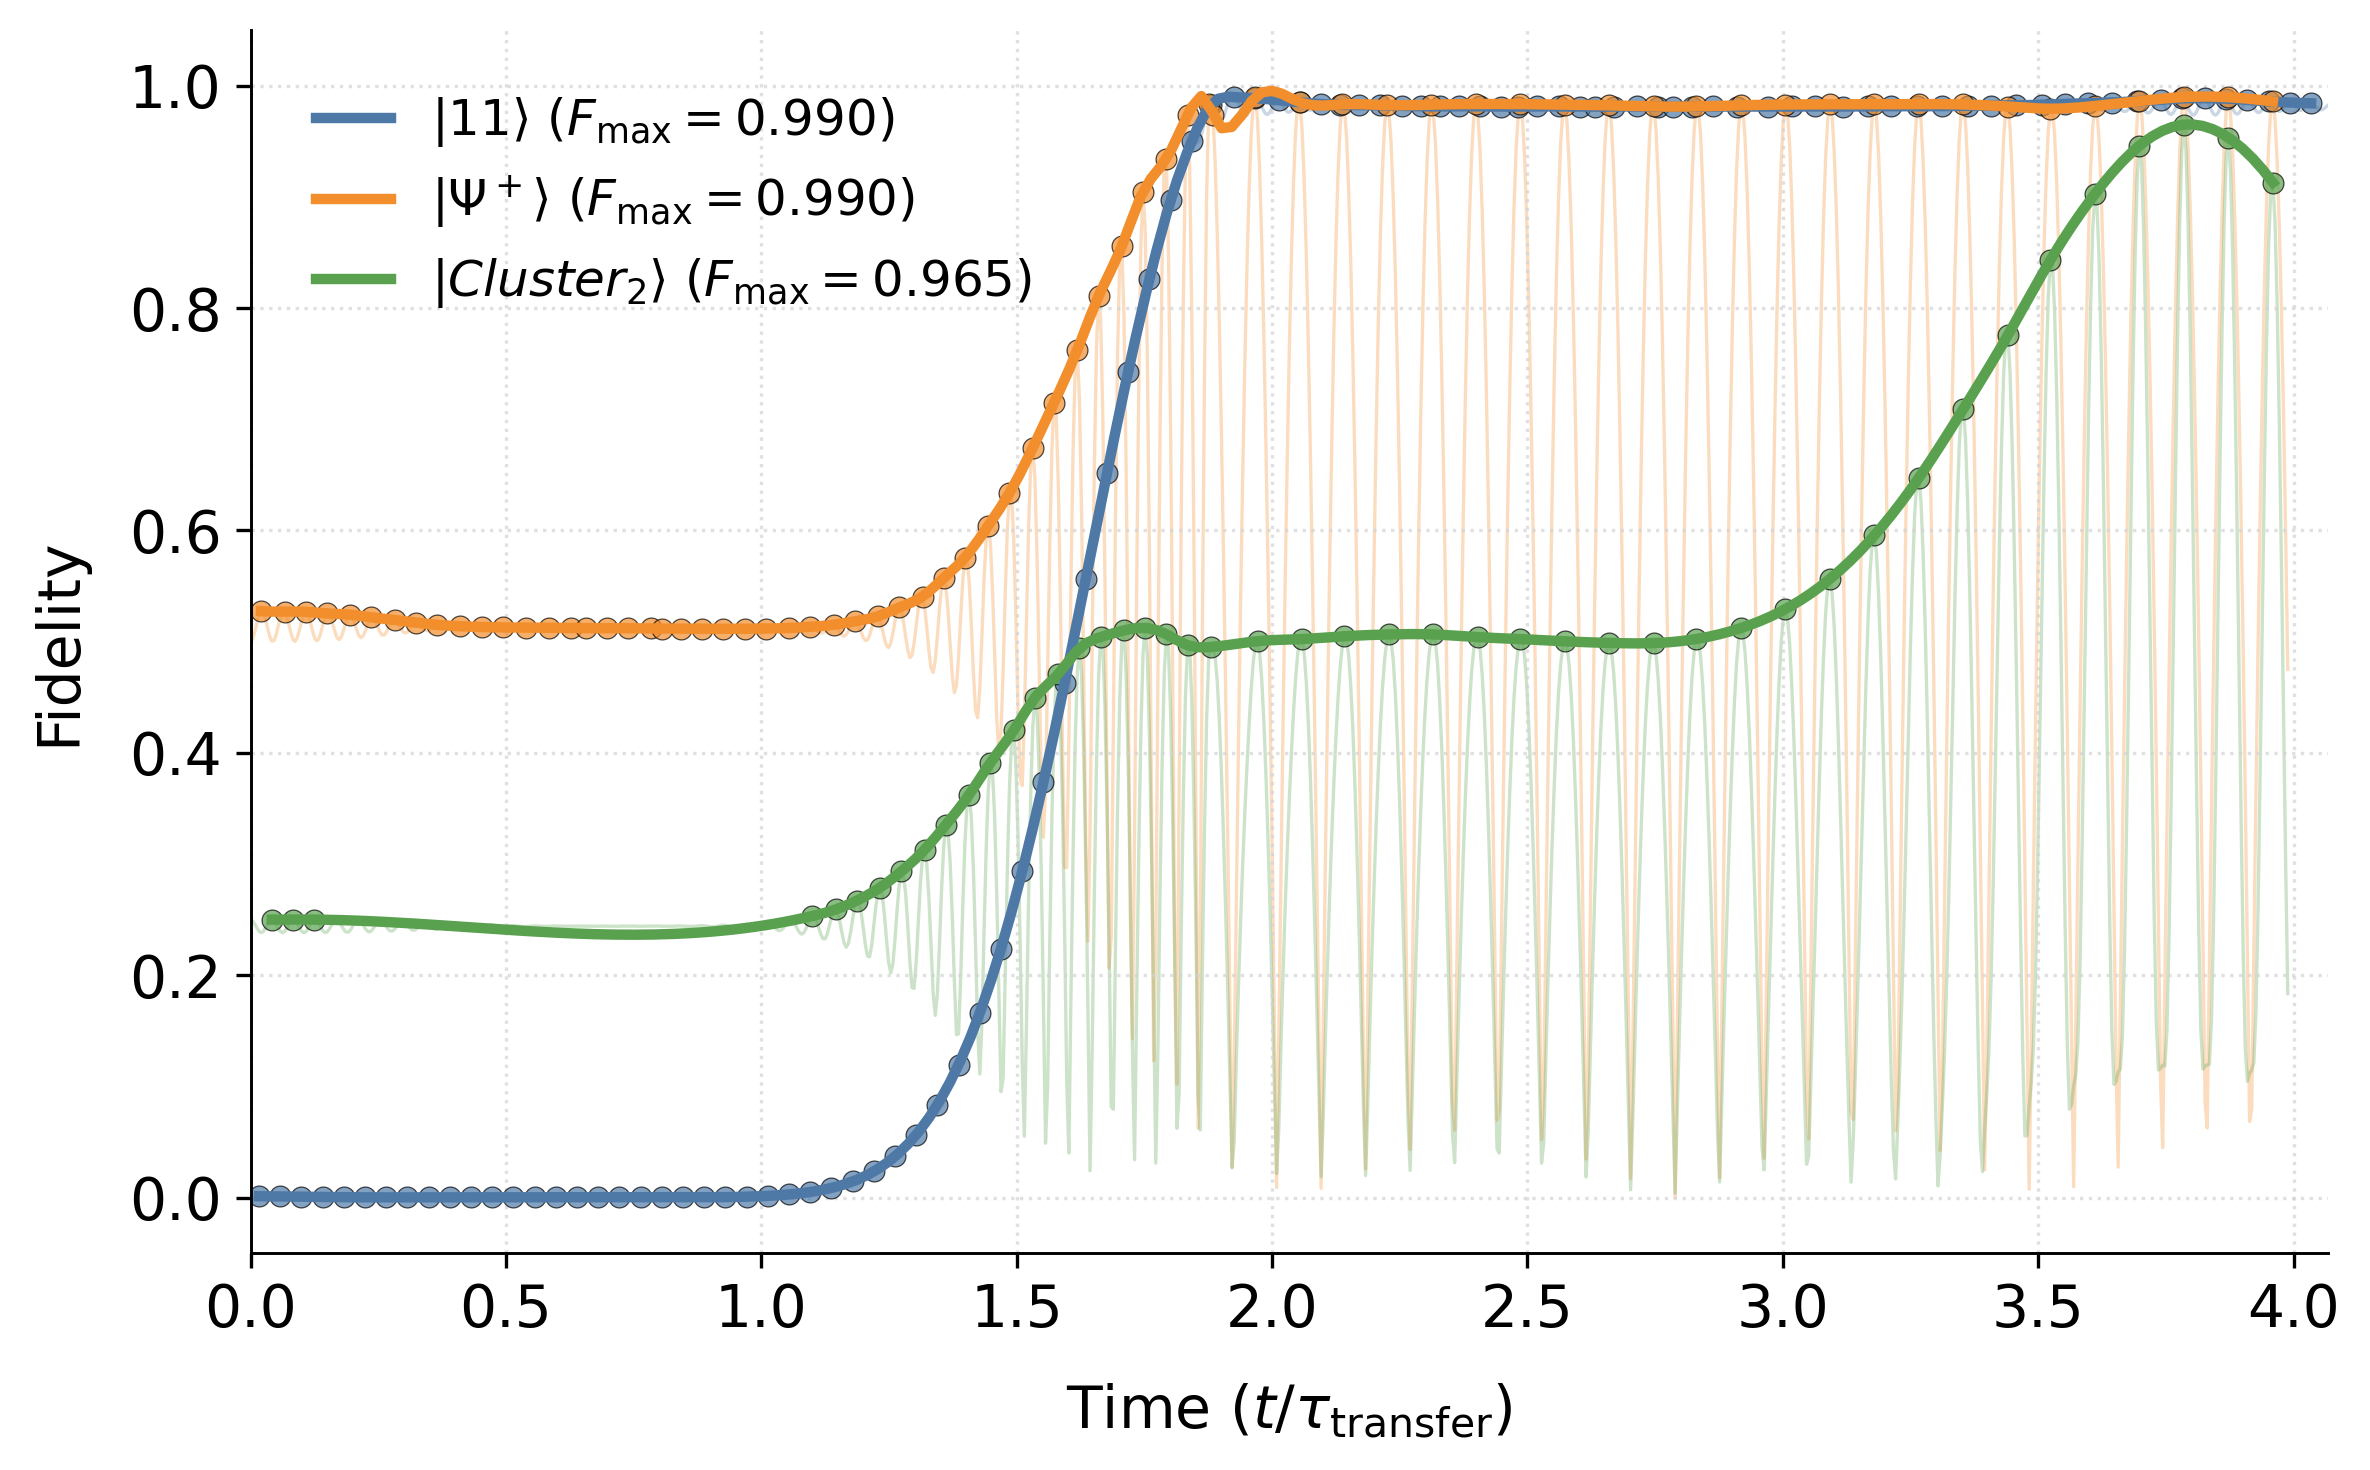

In [5]:
plots.plot_three_fidelity_curves(
    num_steps=len(fidelity_cluster_3),
    fidelity_data_list=[fidelity_11, fidelity_bell, fidelity_cluster_2],
    labels=[r'$|11\rangle$', r'$|\Psi^+\rangle$', r'$|Cluster_2\rangle$'],
    min_peak_height=0.25,
    filepath="/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/figures/paper/2_qubit_fidelity"

)

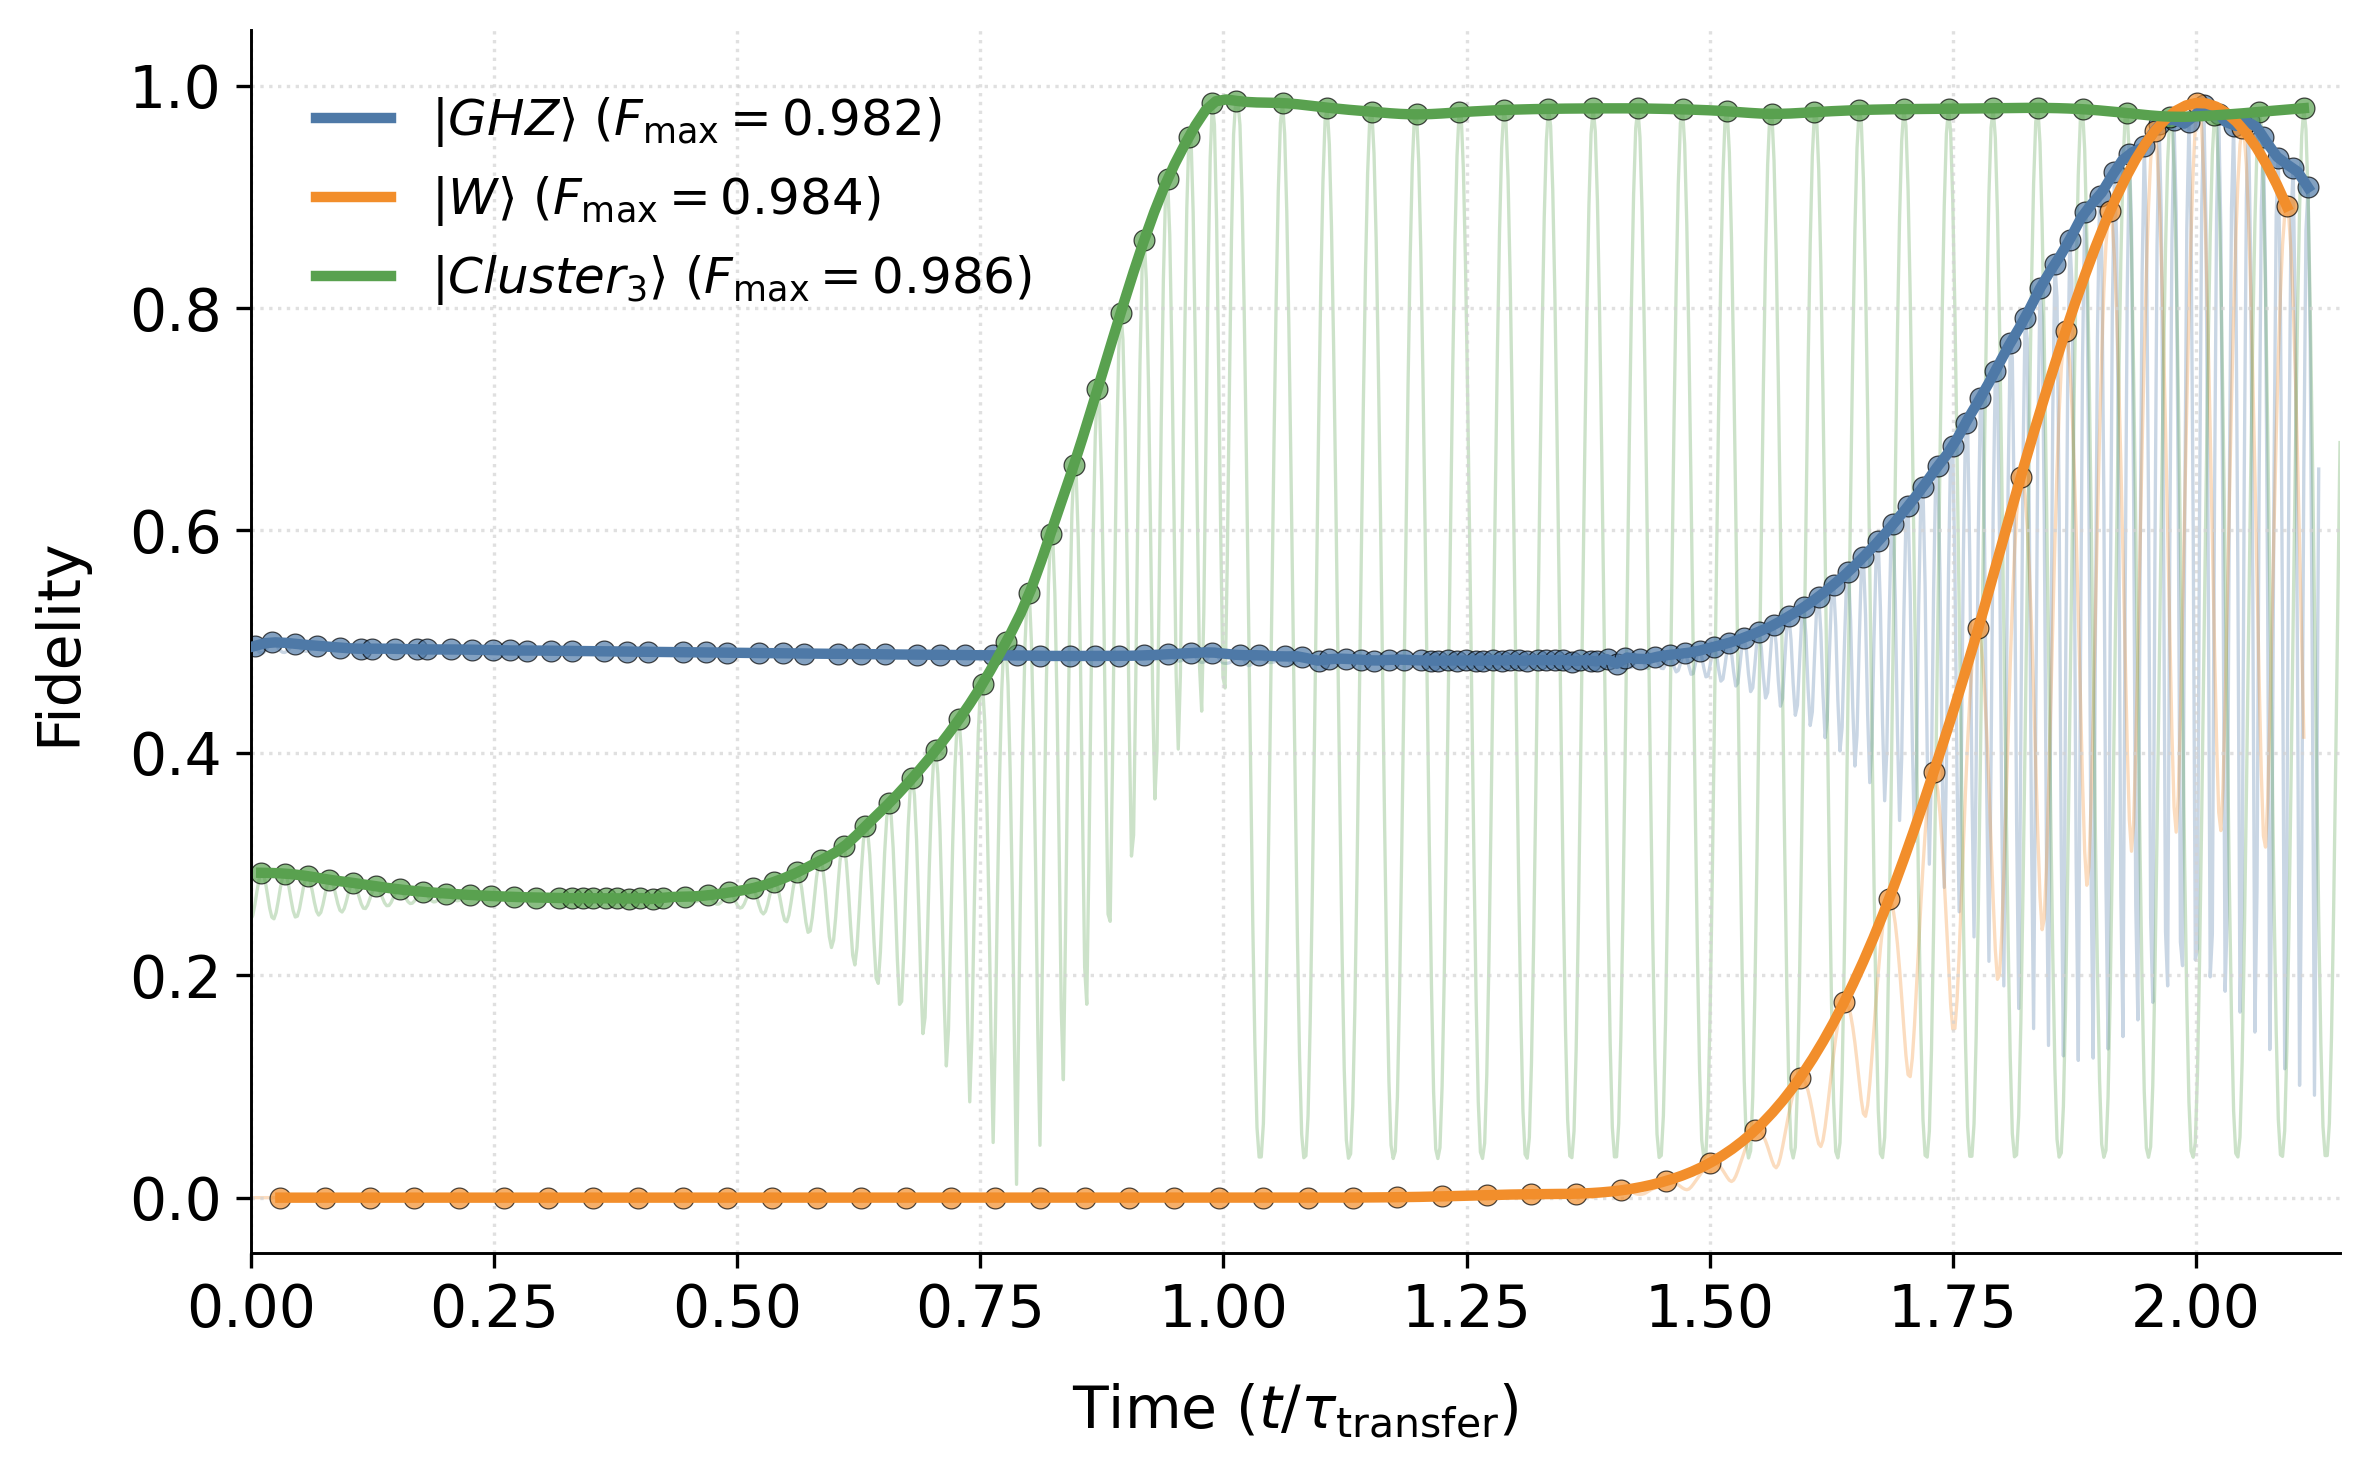

In [6]:
plots.plot_three_fidelity_curves(
    num_steps=len(fidelity_cluster_3),
    fidelity_data_list=[fidelity_ghz, fidelity_w, fidelity_cluster_3],
    labels=[r'$|GHZ\rangle$', r'$|W\rangle$', r'$|Cluster_3\rangle$'],
    min_peak_height=0.25,
    filepath="/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/figures/paper/3_qubit_fidelity"

)

In [ ]:
plots.plot_test_fidelity(total_full_fidelity, N)

In [ ]:
plots.plot_test_z_expectations(magnetizations, N)